In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
result_keys = ['before_no_cos','before_with_cos','in_no_cos','in_with_cos','after_no_cos','after_with_cos','baseline']
thresholds = [0.05,0.10,0.15,0.20,0.25,0.30,0.35]
colors = ['b','g','r','c','y','m','k']
hatches = ['/','*', 'o', 'O', '.','--', '+']

In [3]:
def get_means_stds(string, thresholds):
    means = []
    stds = []
    nan_flags = []
    for thresh in thresholds:
        test_string = "F-score @ threshold " + str(thresh)
        line_detection = [test_string in i for i in string]
        detection_index = line_detection.index(True)
        if 'NAN' in string[detection_index]:
            nan_flags.append(True)
        else:
            nan_flags.append(False)
        data_line = string[detection_index+1].split('Mean: ')[-1]
        mean = float(data_line[:5])
        std = float(data_line[-5:])
        means.append(mean)
        stds.append(std)
    return thresholds, means, stds, nan_flags

In [22]:
def plot_lines(key, thresholds, means, stds, nan_flags,color,hatch):
    if 'with' in key:
        return
    thresholds, means, stds, nan_flags = np.array(thresholds), np.array(means), np.array(stds), np.array(nan_flags)
    plt.plot(thresholds,means,label=key,color=color)
#     plt.errorbar(thresholds,means, stds,color=color)
    for ii in range(len(nan_flags)):
        if nan_flags[ii]:
            plt.scatter(thresholds[ii],means[ii],s=200,marker='x', color=color)
    plt.fill_between(thresholds, means-stds,means+stds,alpha=.25,color=color,hatch=hatch)
    plt.xlabel('Threshold')
    plt.ylabel('F-Score')
    

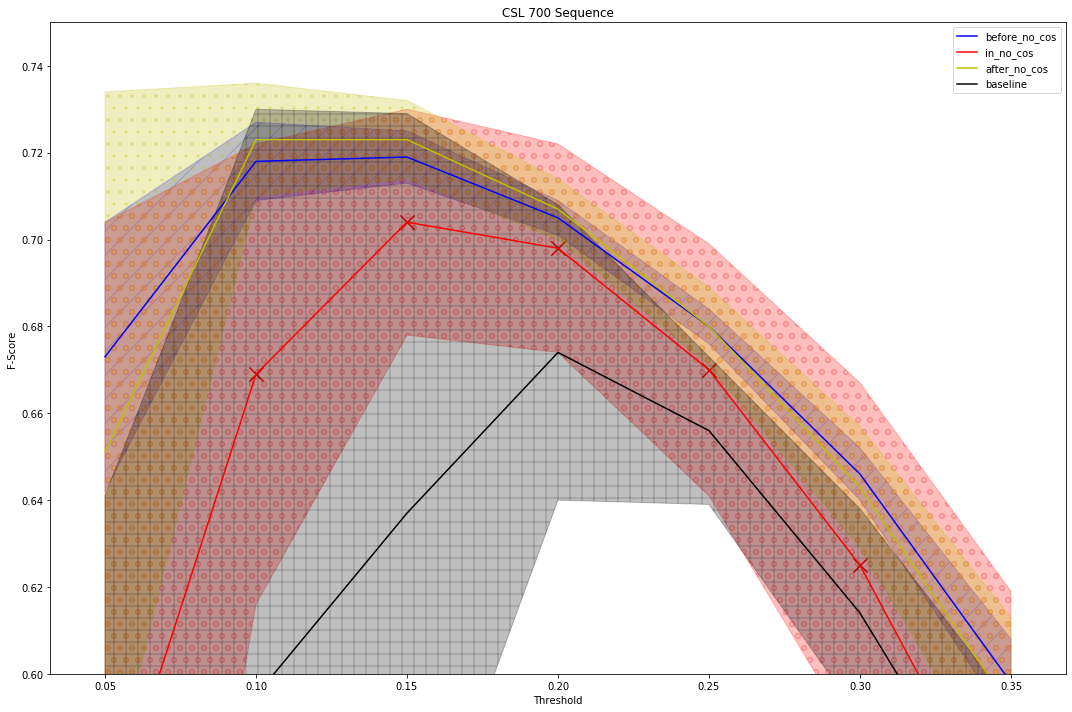

In [23]:
results_file = open(r"/home/spencer/research/radar-rgb-bfs/notebooks/l2 results train side test 700 front","r")
string_input = results_file.read()
results_file.close()
list_input = string_input.splitlines()
result_heading_idxs = []
plt.figure(figsize=(15,10))
for key in result_keys:
    result_heading_idxs.append(list_input.index(key))
for ii in range(len(result_keys)):
    try: single_run = list_input[result_heading_idxs[ii]:result_heading_idxs[ii+1]]
    except: single_run = list_input[result_heading_idxs[ii]:]
    thresholds, means, stds, nan_flags = get_means_stds(single_run, thresholds)
    plot_lines(result_keys[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch=hatches[ii])
plt.legend()
plt.ylim([.6,.75])
plt.title('CSL 700 Sequence')
plt.tight_layout()
plt.savefig('csl_700_performance.png')
plt.show()

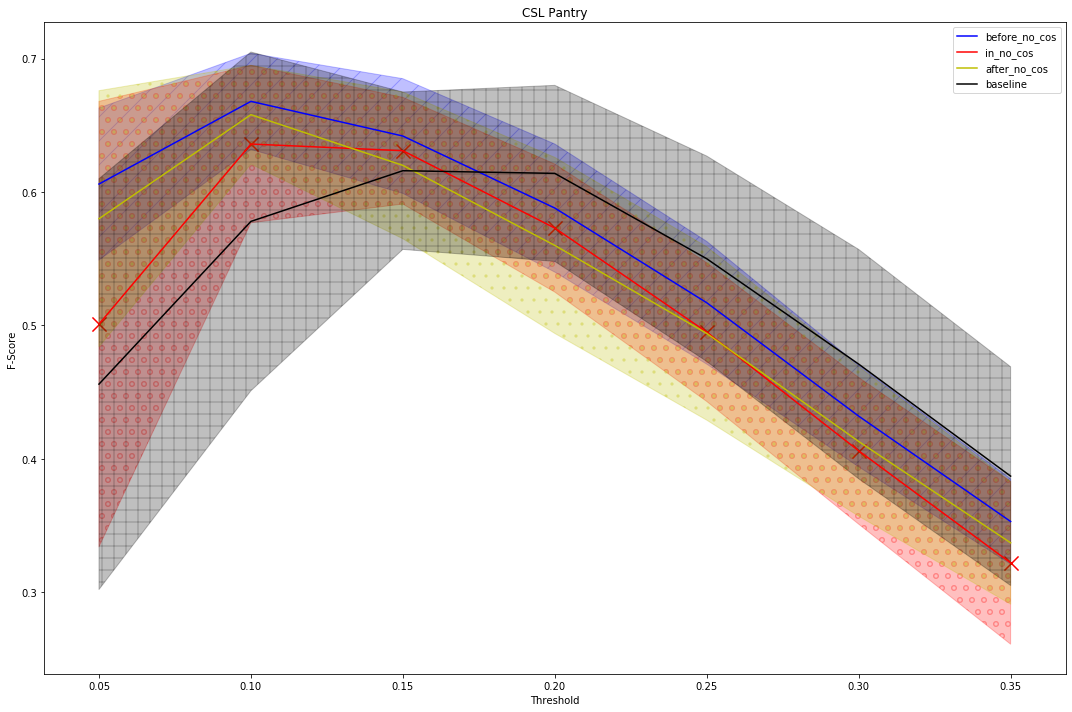

In [25]:
results_file = open(r"/home/spencer/research/radar-rgb-bfs/notebooks/l2 results train side test pantry","r")
string_input = results_file.read()
results_file.close()
list_input = string_input.splitlines()
result_heading_idxs = []
plt.figure(figsize=(15,10))
for key in result_keys:
    result_heading_idxs.append(list_input.index(key))
for ii in range(len(result_keys)):
    try: single_run = list_input[result_heading_idxs[ii]:result_heading_idxs[ii+1]]
    except: single_run = list_input[result_heading_idxs[ii]:]
    thresholds, means, stds, nan_flags = get_means_stds(single_run, thresholds)
    plot_lines(result_keys[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch=hatches[ii])
plt.legend()
# plt.ylim([.6,.75])
plt.title('CSL Pantry')
plt.tight_layout()
plt.savefig('csl_pantry_performance.png')
plt.show()